<h1 style="color:rgb(0,120,170)">Hands-on AI II</h1>
<h2 style="color:rgb(0,120,170)">Unit 5 -- Recurrent Neural Networks </h2>

# Exercise 0

- Import the same modules as discussed in the lecture notebook.
- Check if your model versions are correct.
- Use your GPU if available.

In [63]:
# your imports go here
import u5_utils as u5

import numpy as np
import torch
import torch.utils.data
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys


In [64]:
# model version checks
u5.check_module_versions()
# I know that I have 3.6 but here it isn't shown


Installed Python version: 3.6 (✗)
Installed numpy version: 1.18.3 (✓)
Installed matplotlib version: 3.2.0 (✓)
Installed PyTorch version: 1.3.1+cpu (✓)


In [65]:
# your cuda check goes here
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
print("Device:", device)


Device: cpu


<h1 style="color:rgb(208,90,80)">ATTENTION</h1>
<span style="color:rgb(208,90,80)">Running this notebook might take a considerable amount of time, even with GPUs. To reduce the amount of time you can decrease the number of samples in the training dataset (N_SAMPLES) and the epochs which are used for training (EPOCHS). <br><br> However reducing the number of samples and epochs loses the insights of this notebook.</span>

<h1 style="color:rgb(208,90,80)">HANDING IN THE NOTEBOOK</h1>
<span style="color:rgb(208,90,80)">For handing in the notebook please set N_SAMPLES=32 and EPOCHS=51!</span>

# Exercise 1

- Generate one-hot encoded sequences with a sequence length of 10 and 12 different classes (as it is done in the lecture notebook) where each sequence contains a series of three zeros and where the digit after these three zeros is the target.
- Print the last three elements of the trainset.

In [66]:
# your hyperparameters go here
N_CLASSES = 12
SEQ_LEN = 10
N_SAMPLES = 32
EPOCHS= 51 
CODE_POS = 0 


In [67]:
# your dataloaders go here
trainset = u5.StringCode(n_samples=N_SAMPLES, n_classes=N_CLASSES, seq_len=SEQ_LEN, code_pos=CODE_POS, dev=device)
testset = u5.StringCode(n_samples=N_SAMPLES, n_classes=N_CLASSES, seq_len=SEQ_LEN, code_pos=CODE_POS, dev=device)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

print(trainset[-3])


(tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]]), tensor(5), '-3')


In [68]:
print(trainset[-2])


(tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]]), tensor(1), '-2')


In [69]:
print(trainset[-1])


(tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]]), tensor(9), '-1')


# Exercise 2

- Try to solve the above generated task by a Logistic Regression model
- Report your results on the training set after each epoch.
- Run you final model on the test set, also report your results.

In [32]:
# Logistic regression models relationship between categorical label and some features x
# uses sigmoid function
#def sigmoid(x):
#  return 1 / (1 + np.exp(-x))!!!!!!!!!!!!!!!löschen

In [70]:
import torch.nn.functional as F
class MyLR(nn.Module):
    def __init__(self, input_size, output_size):
        super(MyLR, self).__init__()
        
        # your code goes here
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        # your forward goes here
        out = self.linear(x)
        return F.log_softmax(out, dim=1)
    

In [71]:
# initialize your model
logistic_regression_model = MyLR(input_size=N_CLASSES*SEQ_LEN, output_size=N_CLASSES).to(device)


In [72]:
# print your model
logistic_regression_model


MyLR(
  (linear): Linear(in_features=120, out_features=12, bias=True)
)

In [73]:
np.random.seed(42)
torch.manual_seed(42)

optimizer = optim.Adam(logistic_regression_model.parameters(), lr=1e-2, weight_decay=1e-5)

# your code goes here
for epoch in range(EPOCHS):
    
    # Train NN for one epoch.
    _ = u5.train_network(model=logistic_regression_model, data_loader=trainloader,
                     device=device, optimizer=optimizer, recurrent=False)
    
    if epoch % 10 ==0:
        # Evaluate current NN model on training data set.
        performance = u5.test_network(
            model=logistic_regression_model, data_loader=trainloader, device=device, recurrent=False)
    
        # Print result of current epoch to standard out.
        print(f'Epoch: {str(epoch + 1).zfill(len(str(EPOCHS)))} ' +
              f'/ Loss: {performance[0]:.4f} / Trainings accuracy: {performance[1]:.4f}')
    
# Evaluate final model on test data set.
performance = u5.test_network(
    model=logistic_regression_model, data_loader=testloader, device=device, recurrent=False)
print(f'\nFinal loss: {performance[0]:.4f} / Test accuracy: {performance[1]:.4f}')


Epoch: 01 / Loss: 0.0775 / Trainings accuracy: 0.1250
Epoch: 11 / Loss: 0.0714 / Trainings accuracy: 0.3438
Epoch: 21 / Loss: 0.0675 / Trainings accuracy: 0.4375
Epoch: 31 / Loss: 0.0604 / Trainings accuracy: 0.7188
Epoch: 41 / Loss: 0.0547 / Trainings accuracy: 0.8125
Epoch: 51 / Loss: 0.0508 / Trainings accuracy: 0.9375

Final loss: 0.0487 / Test accuracy: 0.9375


# Exercise 3

- Increase the sequence length to 15
- Place the code at a random position in the sequence
- Print the elements 5,6 of the trainset.
- Try again to solve the above generated task by a Logistic Regression model
- Report your results on the training set after each epoch.
- Run you final model on the test set, also report your results.

In [74]:
SEQ_LEN2 = 15
CODE_POS2 = None


In [75]:
trainset2 = u5.StringCode(n_samples=N_SAMPLES, n_classes=N_CLASSES, seq_len=SEQ_LEN2, code_pos=CODE_POS2, dev=device)
testset2 = u5.StringCode(n_samples=N_SAMPLES, n_classes=N_CLASSES, seq_len=SEQ_LEN2, code_pos=CODE_POS2, dev=device)

trainloader2 = torch.utils.data.DataLoader(trainset2, batch_size=64, shuffle=True, num_workers=2)
testloader2 = torch.utils.data.DataLoader(testset2, batch_size=64, shuffle=False, num_workers=2)

print(trainset2[4])


(tensor([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]), tensor(11), '4')


In [76]:
trainset2[5]


(tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]]), tensor(7), '5')

In [77]:
np.random.seed(42)
torch.manual_seed(42)

logistic_regression_model2 = MyLR(input_size=N_CLASSES*SEQ_LEN2, output_size=N_CLASSES).to(device)

optimizer2 = optim.Adam(logistic_regression_model2.parameters(), lr=1e-2, weight_decay=1e-5)

# your code goes here
for epoch in range(EPOCHS):
    
    # Train NN for one epoch.
    _ = u5.train_network(model=logistic_regression_model2, data_loader=trainloader2,
                     device=device, optimizer=optimizer2, recurrent=False)
    
    if epoch % 10 ==0:
        # Evaluate current NN model on training data set.
        performance = u5.test_network(
            model=logistic_regression_model2, data_loader=trainloader2, device=device, recurrent=False)
    
        # Print result of current epoch to standard out.
        print(f'Epoch: {str(epoch + 1).zfill(len(str(EPOCHS)))} ' +
              f'/ Loss: {performance[0]:.4f} / Trainings accuracy: {performance[1]:.4f}')
    
# Evaluate final model on test data set.
performance = u5.test_network(
    model=logistic_regression_model2, data_loader=testloader2, device=device, recurrent=False)
print(f'\nFinal loss: {performance[0]:.4f} / Test accuracy: {performance[1]:.4f}')


Epoch: 01 / Loss: 0.0765 / Trainings accuracy: 0.0625
Epoch: 11 / Loss: 0.0756 / Trainings accuracy: 0.1875
Epoch: 21 / Loss: 0.0716 / Trainings accuracy: 0.2812
Epoch: 31 / Loss: 0.0710 / Trainings accuracy: 0.3125
Epoch: 41 / Loss: 0.0625 / Trainings accuracy: 0.4688
Epoch: 51 / Loss: 0.0621 / Trainings accuracy: 0.3750

Final loss: 0.0599 / Test accuracy: 0.4375


# Exercise 4

- Now try to solve this task of sequence length 15 with a vanilla RNN 
- Use the same RNN structure as discussed in the lecture notebook
- Report your results on the training set after each epoch.
- Run you final model on the test set, also report your results
- Plot the gradients with respect to the inputs

In [78]:
class MyRNN(nn.Module):
    def __init__(self, input_size, num_rnn_cells, num_layers, num_classes):
        super(MyRNN, self).__init__()
        
        # your code goes here
        self.rnn = nn.RNN(input_size, num_rnn_cells, num_layers, batch_first=True)
        self.fc = nn.Linear(num_rnn_cells, num_classes) 
    
    def forward(self, x):
        # your forward goes here
        out, _ = self.rnn(x)     
        return self.fc(out[:, -1, :])
    

In [79]:
recurrent_neural_network_model = MyRNN(input_size=N_CLASSES, num_rnn_cells=N_CLASSES*2, num_layers=1, num_classes=N_CLASSES).to(device)


In [80]:
# print your model
recurrent_neural_network_model


MyRNN(
  (rnn): RNN(12, 24, batch_first=True)
  (fc): Linear(in_features=24, out_features=12, bias=True)
)

In [81]:
np.random.seed(42)
torch.manual_seed(42)

optimizer3 = optim.Adam(recurrent_neural_network_model.parameters(), lr=1e-2, weight_decay=1e-5)

# your code goes here
gradients_rnn = []
for epoch in range(EPOCHS):
    
    # Train NN for one epoch.
    gradients = u5.train_network(model=recurrent_neural_network_model, data_loader=trainloader2,
                     device=device, optimizer=optimizer3, recurrent=True)
    
    if epoch % 10 ==0:
        # Evaluate current NN model on training data set.
        performance = u5.test_network(
            model=recurrent_neural_network_model, data_loader=trainloader2, device=device, recurrent=True)
        
        # append gradients
        if (epoch < 101):
            gradients_rnn.append([epoch,gradients])
    
        # Print result of current epoch to standard out.
        print(f'Epoch: {str(epoch + 1).zfill(len(str(EPOCHS)))} ' +
              f'/ Loss: {performance[0]:.4f} / Trainings accuracy: {performance[1]:.4f}')
    
# Evaluate final model on test data set.
performance = u5.test_network(
    model=recurrent_neural_network_model, data_loader=testloader2, device=device, recurrent=True)
print(f'\nFinal loss: {performance[0]:.4f} / Test accuracy: {performance[1]:.4f}')


Epoch: 01 / Loss: 0.0779 / Trainings accuracy: 0.0312
Epoch: 11 / Loss: 0.0782 / Trainings accuracy: 0.1250
Epoch: 21 / Loss: 0.0742 / Trainings accuracy: 0.2500
Epoch: 31 / Loss: 0.0742 / Trainings accuracy: 0.2812
Epoch: 41 / Loss: 0.0726 / Trainings accuracy: 0.2500
Epoch: 51 / Loss: 0.0732 / Trainings accuracy: 0.2188

Final loss: 0.0798 / Test accuracy: 0.0000


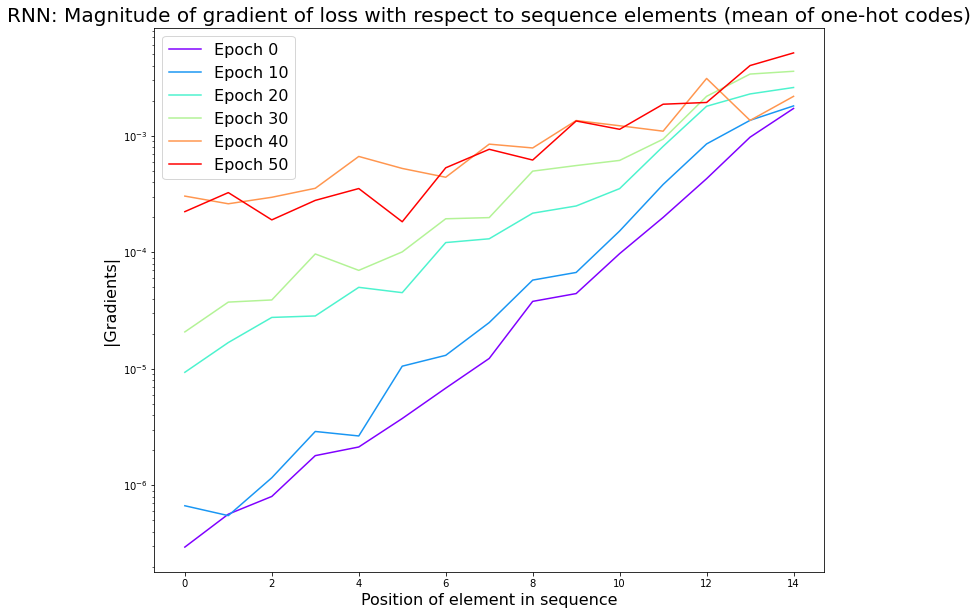

In [82]:
# your gradient plot goes here
u5.plt_gradients(gradients_rnn,"RNN")


# Exercise 5

- Now try to solve this task of sequence length 15 with an LSTM 
- Use the same LSTM structure as discussed in the lecture notebook
- Report your results on the training set after each epoch.
- Run you final model on the test set, also report your results
- Plot the gradients with respect to the inputs

In [83]:
class MyLSTM(nn.Module):
    def __init__(self, input_size, num_lstm_cells, num_layers, num_classes):
        super(MyLSTM, self).__init__()
        
        # your code goes here
        self.rnn = nn.LSTM(input_size, num_lstm_cells, num_layers, batch_first=True)
        self.fc = nn.Linear(num_lstm_cells, num_classes)
        
    def deactivateFG(self):
        for names in self.rnn._all_weights:
            for name in filter(lambda n: "bias" in n, names):
                bias = getattr(self.rnn, name)
                n = bias.size(0)
                start, end = n // 4, n // 2
                bias.data[start:end].fill_(1e4)
    
    def forward(self, x):
        out, _ = self.rnn(x)     
        return self.fc(out[:, -1, :]) # -1 take last output layer
    

In [85]:
np.random.seed(42)
torch.manual_seed(42)

lstm_neural_network_model = MyLSTM(input_size=N_CLASSES, num_lstm_cells=N_CLASSES, num_layers=1, num_classes=N_CLASSES)
lstm_neural_network_model.deactivateFG()
lstm_neural_network_model = lstm_neural_network_model.to(device)
optimizer3 = optim.Adam(lstm_neural_network_model.parameters(), lr=1e-2, weight_decay=1e-5)

# your code goes here
gradients_lstm = []
for epoch in range(EPOCHS):
    
    gradients2 = u5.train_network(model=lstm_neural_network_model, data_loader=trainloader2,
                     device=device, optimizer=optimizer3, recurrent=True)
    
    if epoch % 10 ==0:
        # Evaluate current NN model on training data set.
        performance = u5.test_network(
            model=lstm_neural_network_model, data_loader=trainloader2, device=device, recurrent=True)
        
        # append gradients
        if (epoch < 101):
            gradients_lstm.append([epoch,gradients2])
    
        # Print result of current epoch to standard out.
        print(f'Epoch: {str(epoch + 1).zfill(len(str(EPOCHS)))} ' +
              f'/ Loss: {performance[0]:.4f} / Trainings accuracy: {performance[1]:.4f}')
    
# Evaluate final model on test data set.
performance = u5.test_network(
    model=lstm_neural_network_model, data_loader=testloader2, device=device, recurrent=True)
print(f'\nFinal loss: {performance[0]:.4f} / Test accuracy: {performance[1]:.4f}')


Epoch: 01 / Loss: 0.0783 / Trainings accuracy: 0.1250
Epoch: 11 / Loss: 0.0765 / Trainings accuracy: 0.0312
Epoch: 21 / Loss: 0.0764 / Trainings accuracy: 0.1250
Epoch: 31 / Loss: 0.0754 / Trainings accuracy: 0.0938
Epoch: 41 / Loss: 0.0780 / Trainings accuracy: 0.0625
Epoch: 51 / Loss: 0.0751 / Trainings accuracy: 0.1875

Final loss: 0.0772 / Test accuracy: 0.0938


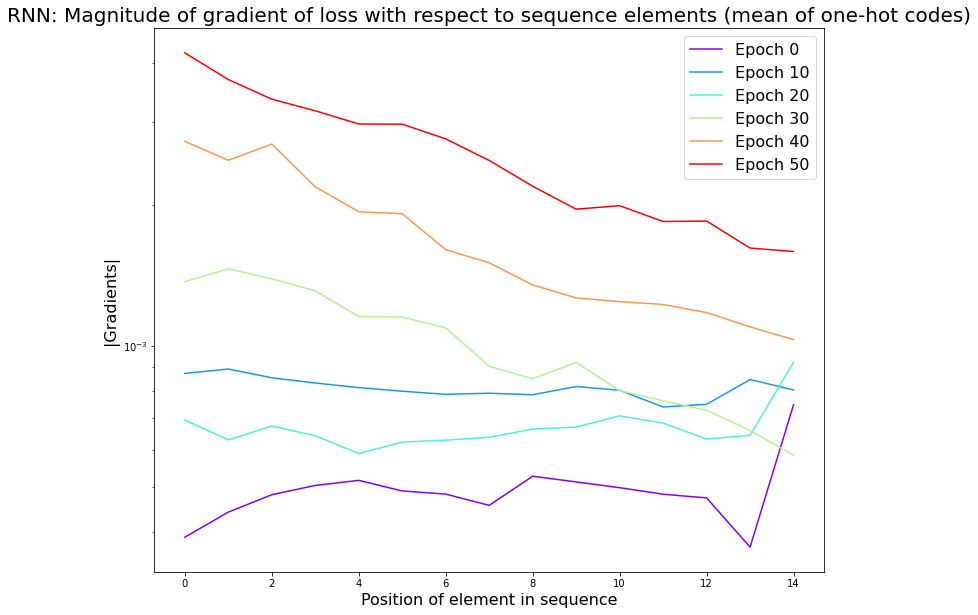

In [87]:
# your gradient plot goes here
u5.plt_gradients(gradients_lstm,"RNN")


# Exercise 6

- Compare the number of parameters of the three different models. Which one has the most?

In [88]:
# your code goes here
total_params_fnn = u5.count_parameters(logistic_regression_model2)
total_params_rnn = u5.count_parameters(recurrent_neural_network_model)
total_params_lstm = u5.count_parameters(lstm_neural_network_model)

print(f'Trainable parameters Logistic Regression Model {total_params_fnn} \nTrainable parameters RNN {total_params_rnn} \nTrainable parameters LSTM {total_params_lstm}')


Trainable parameters Logistic Regression Model 2172 
Trainable parameters RNN 1212 
Trainable parameters LSTM 1404


The most parameters has the Logistic Regression Model.

# Exercise 7

- Double the number of LSTM cells. How does the number of parameters change?

In [89]:
# your code goes here
lstm_neural_network_model2 = MyLSTM(input_size=N_CLASSES, num_lstm_cells=N_CLASSES*2, num_layers=1, num_classes=N_CLASSES)


In [91]:
total_params_lstm2 = u5.count_parameters(lstm_neural_network_model2)
total_params_lstm2


3948

Now there are more than the double of parameter than before (1404 vs. 3948).